In [4]:
import networkx as nx
import numpy as np
import csv
import matplotlib
import matplotlib.pylab as plt

%matplotlib inline

In [5]:
def drawGz(G,z, name):
    # DO NOT MODIFY THIS FUNCTION
    # This function draws G with node labels from partition z
    #
    # input  : G is a networkx graph
    #        : z is a dictionary of group labels for G's nodes
    # output : none
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted

    colors = ['#d61111','#11c6d6','#d67711','#11d646','#1b11d6','#d611cc'] # map node labels to colors (for the visualization)

    node_colors = []
    node_labels = []
    
    for i in G.nodes():
        node_colors.append(colors[int(z[i])])
        node_labels.append(int(z[i]))
    
    nsize  = 600
    flabel = True

    if G.order() > 50:
        nsize  = 300
        flabel = False
        
    nx.draw_networkx(G,with_labels=flabel,node_size=nsize, width=2,node_color=node_colors) # draw it pretty
    limits=plt.axis('off')                                      # turn off axes
    

    return node_colors, node_labels

In [6]:
def plot_CCDF(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the CCDF of the degree distribution Pr(K>=k) for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    cumcounts = np.cumsum(counts)
    cumcounts = np.insert(cumcounts,0,0)
    plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.show()
    return

reading the network file : ComNet_all.csv

number of nodes, n  = 1474
number of edges, m  = 21867
mean degree,    <k> = 29.67
clustering coefficient, C     =  0.19
mean geodesic distance, <ell> =  2.08


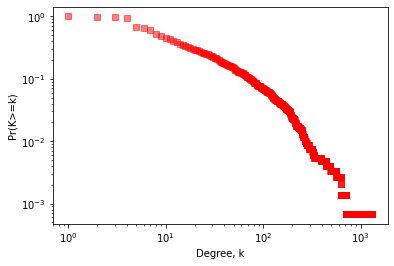

In [7]:
fname1 = 'ComNet_all.csv'

# read in the network file (an edge list)
print(f'reading the network file : {fname1}\n')
G = nx.read_edgelist('./' + fname1, delimiter=',', nodetype=str)  # import as a simple graph, index nodes by integers (not strings)

# with open('ComNet_all.csv', newline='') as csvfile:
#         spamreader = csv.reader(csvfile, delimiter=',')
#         for row in spamreader:
#             if G.has_edge(row[0],row[1]) == False or G.has_edge(row[1],row[0]) == False:
#                 G.add_edge(row[0],row[1])
    

#YOUR CODE HERE
n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)
kmean = 2*m/n
C = nx.transitivity(G)
ellmean = nx.average_shortest_path_length(G)
degrees = nx.degree(G)
kis = [k for _,k in degrees]

print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree,    <k> = %5.2f' % kmean)
print(f'clustering coefficient, C     = %5.2f' % C)
print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)

plot_CCDF(kis)

# plt.figure(1, figsize=(10,10))
# plt.title("HVR_1 Ridiculogram")
# pos = nx.spring_layout(G)
# nx.draw(G, pos)
# edge_labels = nx.get_edge_attributes(G, 'label')
# nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)
# nx.draw_networkx_labels(G, pos, font_size=10)
# plt.show()

In [8]:
groups = {}

fname = "DCSBM_Clusters.csv"
m = np.loadtxt(open(fname, "rb"), delimiter=",")
z = {}
pageranks = nx.pagerank(G)

m = m.tolist()
node_labels = list(G.nodes().keys())
    
for j in range(len(m)):
    z[node_labels[j]] = int(m[j])
    if int(m[j]) in groups:
        groups[int(m[j])][node_labels[j]] = pageranks[node_labels[j]]
    else:
        groups[int(m[j])] = {node_labels[j]: pageranks[node_labels[j]]}
#     pngName = "DCSBMExp" + str(i+1) + ".png"
#     color, group = drawGz(G,z,pngName)

#     legend = {'blue': 0, 'green': 0, 'orange': 0}

#     for j in range(len(color)):
#         if color[j] == '#11c6d6' and legend['blue'] == 0:
#             legend['blue'] = group[j]
#         if color[j] == '#11d646' and legend['green'] == 0:
#             legend['green'] = group[j]
#         if color[j] == '#d67711' and legend['orange'] == 0:
#             legend['orange'] = group[j]



In [9]:
maxRanks = {}

for group in groups:
    maxRanks[group] = [max(groups[group], key=groups[group].get), max(groups[group].values())]
    print(len(groups[group]), group)

110 2
335 5
192 3
619 4
218 1


In [10]:
print(maxRanks, highest_degrees)

NameError: name 'highest_degrees' is not defined

In [11]:
# create subgraphs from each cluster

SGs = {}

for group in groups:
    
    SGs[group] = G.subgraph(groups[group])

In [12]:
# convert each graph to edgelist in order to run dc-sbm in R
i = 1
for SG in SGs:
    fname = "subgraph_" + str(i) + ".csv"
    nx.write_edgelist(SGs[SG], fname, delimiter=",",data=True, encoding='utf-8')
    i += 1

In [21]:
i = 0
subgroups = {}

for SG in SGs:
    subgroups[SG] = {}
    pageranks = nx.pagerank(SGs[SG])
    fname = "DCSBM_Subcluster" + str(i) + ".csv"
    m = np.loadtxt(open(fname, "rb"), delimiter=",")
    z = {}
    m = m.tolist()
    print(len(m))
    node_labels = list(SGs[SG].nodes().keys())
    i += 1
    for j in range(len(m)):
        z[node_labels[j]] = int(m[j])
        if int(m[j]) in subgroups[SG]:
            subgroups[SG][int(m[j])][node_labels[j]] = pageranks[node_labels[j]]
        else:
            subgroups[SG][int(m[j])] = {node_labels[j]: pageranks[node_labels[j]]}

110
129
192
298
218


In [17]:
sub_maxRanks = {}

for subgroup in subgroups:
    sub_maxRanks[subgroup] = {}
    for sub in subgroups[subgroup]:
        print(subgroups[subgroup][sub])
        sub_maxRanks[subgroup][sub] = [max(subgroups[subgroup][sub], key=subgroups[subgroup][sub].get), len(subgroups[subgroup][sub])]

{'Q25.8': 0.004465725982416074, 'J98.1': 0.0025132846539928227, 'Q21.4': 0.008864998160023223, 'O75.4': 0.002271274564219673, 'P28.4': 0.0030823759697908622, 'P36.4': 0.002556783637673979, 'I28.8': 0.005906826160199527, 'Q21.0': 0.02692550170454428, 'I27.8': 0.005422077705928724, 'Z01.3': 0.002791516199472376, 'R57.8': 0.013717742514812137, 'Q21.1': 0.03054129510956074, 'Q24.3': 0.014393032099876408, 'Q20.4': 0.012692621019010685, 'O99.8': 0.007965040435656563, 'I27.2': 0.01913322057603737, 'A04.7': 0.0022973713565076245, 'Q63.2': 0.003168199997958033, 'T82.8': 0.01127828061087626, 'I46.1': 0.019176263664051237, 'Q20.1': 0.0187743550836307, 'R90.X': 0.0022353565076180864, 'R04.2': 0.00423072181603025, 'Q23.8': 0.007259367411070781, 'Q22.4': 0.012232248394852121, 'Z95.5': 0.014444260041198797, 'Q22.2': 0.013259535838026564}
{'P27.1': 0.003381247792596915, 'I97.1': 0.01041763195728034, 'Q26.8': 0.007931726579984977, 'I72.9': 0.0025459031433249474, 'Q62.5': 0.003096541568496965, 'Q23.1': 

In [112]:
print(sub_maxRanks)

{2: {2: ['Q21.1', 27], 3: ['R57.0', 27], 4: ['I27.2', 21], 1: ['Q24.8', 24], 5: ['Q21.0', 11]}, 5: {2: ['I49.8', 58], 6: ['N06.7', 4], 4: ['Z00.5', 34], 5: ['M93.9', 8], 7: ['H91.1', 2], 3: ['I10.X', 8], 8: ['B95.7', 4], 1: ['N04.X', 11]}, 3: {1: ['I25.8', 61], 3: ['I70.9', 48], 4: ['I11.0', 35], 2: ['Z01.7', 48]}, 4: {3: ['Z03.8', 169], 5: ['T86.2', 11], 7: ['I72.8', 11], 4: ['C34.9', 15], 1: ['I09.1', 45], 6: ['O99.4', 38], 2: ['Q66.5', 9]}, 1: {4: ['Z49.1', 32], 6: ['M32.1', 38], 1: ['N18.9', 39], 3: ['Z49.2', 35], 5: ['T86.1', 26], 2: ['S37.0', 26], 7: ['N17.9', 22]}}


In [14]:
sub_highest_degrees = {}
for SG in SGs:
    sub_highest_degrees[SG] = {}
    for sub in subgroups[SG]:
        sub_highest_degrees[SG][sub] = []
        for node in subgroups[SG][sub]:
            if sub_highest_degrees[SG][sub] == []:
                sub_highest_degrees[SG][sub] = [node, SGs[SG].degree[node]]
            elif sub_highest_degrees[SG][sub][1] < SGs[SG].degree[node]:
                 sub_highest_degrees[SG][sub] = [node, SGs[SG].degree[node]]

In [15]:
print(sub_highest_degrees)

{2: {1: ['Q21.1', 89], 3: ['Y83.1', 72], 4: ['Z95.8', 52], 5: ['Q23.0', 42], 2: ['Q24.8', 107]}, 5: {2: ['I49.8', 16], 8: ['Z00.5', 8], 3: ['D54.9', 1], 5: ['B37.0', 1], 7: ['N92.6', 2], 4: ['O82.2', 1], 1: ['N04.X', 3], 6: ['I10.X', 37]}, 3: {4: ['I70.9', 149], 3: ['I25.8', 174], 1: ['I48.X', 155], 2: ['Z01.7', 179]}, 4: {5: ['I60.9', 7], 3: ['I61.1', 2], 4: ['I65.8', 3], 1: ['Z03.8', 8], 2: ['E21.0', 4], 6: ['I09.1', 67], 7: ['K76.6', 7]}, 1: {4: ['N18.9', 210], 2: ['I12.0', 43], 1: ['N06.9', 51], 3: ['Z49.2', 119], 8: ['Z96.8', 107], 7: ['D64.9', 67], 6: ['I15.1', 70], 5: ['Z49.1', 139]}}


In [16]:
#recreate results from net_all_ages.csv file
final_data = {} #holds the data we are trying to recereate

node_vals = list(G.nodes().keys())
shortest_path = nx.average_shortest_path_length(G)
curr_between = nx.current_flow_betweenness_centrality(G)
short_between = nx.betwxeenness_centrality(G)
closeness = nx.closeness_centrality(G)

i = 0
for node in node_vals:
            
    final_data[node] = {
        "name": node_vals[i], 
        "ClusteringCoeff": nx.clustering(G, node_vals[i]), 
        "Eccentricity": nx.eccentricity(G, node_vals[i]), 
        "Number Of Edges": G.degree[node_vals[i]], 
        "Current Flow Betweenness Centrality": curr_between[node_vals[i]], 
         "Shortest Path Betweenness Centrality": short_between[node_vals[i]], 
        "Closeness Centrality": closeness[node_vals[i]],
        "Degree": G.degree[node_vals[i]]
    }
    i += 1


KeyboardInterrupt: 